# Ans 1(a)

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [154]:
Data=pd.read_csv('cricketers.csv')

In [155]:
new = Data.iloc[:,0].str.split("\t", n = 13, expand = True)

In [156]:
NewData = pd.DataFrame(columns = ['PLAYER','matches_played','innings_batted','runs_scored','highest_runs','balls_faced',
                            'average_runs','strike_rate','innings_bowled','overs','runs_given','wickets_obtained',
                            'average_runs_per_wicket','bowling_economy'])
NewData["PLAYER"] = new.iloc[:,0]
NewData["matches_played"] = new.iloc[:,1]
NewData["innings_batted"] = new.iloc[:,2]
NewData["runs_scored"] = new.iloc[:,3]
NewData["highest_runs"] = new.iloc[:,4]
NewData["balls_faced"] = new.iloc[:,5]
NewData["average_runs"] = new.iloc[:,6]
NewData["strike_rate"] = new.iloc[:,7]
NewData["innings_bowled"] = new.iloc[:,8]
NewData["overs"] = new.iloc[:,9]
NewData["runs_given"] = new.iloc[:,10]
NewData["wickets_obtained"] = new.iloc[:,11]
NewData["average_runs_per_wicket"] = new.iloc[:,12]
NewData["bowling_economy"] = new.iloc[:,13]

In [157]:
NewData.drop(["PLAYER"], axis = 1, inplace = True)

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
NData = scaler.fit_transform(NewData)

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
# Taking the average_runs and bowling_economy columns in a array D. These are the selected features for clustering the data points.
D = NData[:,[5,12]]

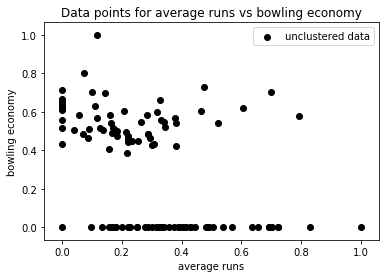

In [8]:
#Plotting the data
plt.scatter(D[:,0],D[:,1],c='black',label='unclustered data')
plt.xlabel('average runs')
plt.ylabel('bowling economy')
plt.legend()
plt.title('Data points for average runs vs bowling economy')
plt.show()

In [9]:
def kmeans_algo(D, n, n_iter, Centroids, K):
    #For each training example compute the euclidian distance from the centroid and assign the cluster based on the minimal distance.
    #The output will be a dictionary with cluster number as Keys and the data points which belong to that cluster as values.
    Output={}
    # Number of records in data
    m = D.shape[0]
    #We iterate over n_iter and repeat the E-Step and M-Step, till the convergence is achieved.
    #We find the euclidian distance from each point to all the centroids and store in a m X K matrix. 
    #Every row in EuclidianDistance matrix will have distances of that particular data point from all the centroids.
    #We then find the minimum distance and store the index of the column in a vector C.
    #E-Step
    WCSS=np.array([])
    for i in range(n_iter):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((D-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1
    #We regroup the data points based on the cluster index C and store in the Output dictionary and 
    #also compute the mean of separated clusters and assign it as new centroids. 
    #Y is a temporary dictionary which stores the solution for one particular iteration.
    #M-Step
        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(2,0)
        for j in range(m):
            Y[C[j]]=np.c_[Y[C[j]],D[j]]
        for k in range(K):
            Y[k+1]=Y[k+1].T
        Output=Y
    #wcss is the sum of euclidean distance of all the points from their respective centroid. It is the total of all the euclidean
    #distances. It is stored in WCSS array for each iteration.
        wcss=0
        for k in range (K):
            wcss+= np.sum((Centroids[:,k]-Y[k+1])**2)
        WCSS=np.append(WCSS,wcss)
        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0)
    return Centroids, Output, WCSS

In [10]:
# Number of features
n = 2
# Maximum number of iteration for the convergence
n_iter=10

## Strategy 1 with centroid initialized as mean of data points plus a random vector

In [13]:
import random as rd
Centroids_mean=np.array([]).reshape(n,0)
CI=np.array([])
# Number of clusters
K = 2
m = D.shape[0]
#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.
for i in range(K):
    rand=rd.randint(0,m-1)
    CI = np.mean(D,axis=0) + D[rand]
    Centroids_mean=np.c_[Centroids_mean, CI]
print('Initialized Centroids from strategy 1', Centroids_mean.transpose())

Initialized Centroids from strategy 1 [[0.45312003 0.31211009]
 [0.45971372 0.85453433]]


In [14]:
Cent_1_f , Output1, WCSS_mean = kmeans_algo(D,n,n_iter,Centroids_mean, K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_mean)

Within cluster sum of squared distances of data points converging with iterations as:  [14.72161156  8.07072743  4.84318321  4.55170714  4.55170714  4.55170714
  4.55170714  4.55170714  4.55170714  4.55170714]


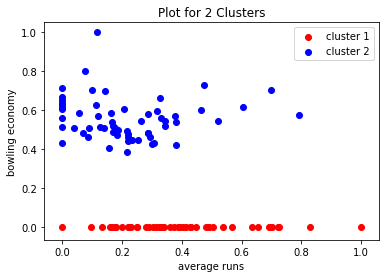

In [15]:
#Plotting the scatter plot for the two clusters.
color=['red','blue']
labels=['cluster 1','cluster 2']
for k in range(K):
    plt.scatter(Output1[k+1][:,0],Output1[k+1][:,1],c=color[k],label=labels[k])
plt.xlabel('average runs')
plt.ylabel('bowling economy')
plt.legend()
plt.title('Plot for 2 Clusters')
plt.show()

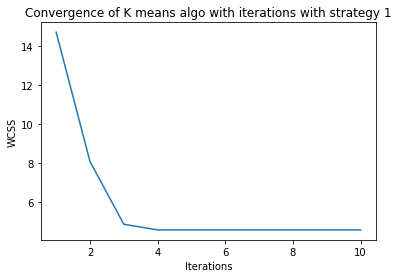

In [16]:
plt.plot(range(1, n_iter+1), WCSS_mean)
plt.title('Convergence of K means algo with iterations with strategy 1')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

###  On seeing the above graph, we can conclude that it took 4 iterations for the K means algorithm to converge to local optimum when centroids initialized using strategy 1.

In [64]:
Iter_m_2 = 4

## Strategy 2 for centroid initialization as kmeans++

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=K, init='k-means++', max_iter=1, n_init=1)
km.fit(D)
Centroids_k = km.cluster_centers_
print('Initialized Centroids from strategy 2', Centroids_k)

Initialized Centroids from strategy 2 [[0.27129352 0.61626894]
 [0.30466988 0.18570641]]


In [22]:
Cent_2_f , Output2, WCSS_k = kmeans_algo(D,n,n_iter,Centroids_k.transpose(), K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_k)

Within cluster sum of squared distances of data points converging with iterations as:  [7.09587758 4.55585617 4.55170714 4.55170714 4.55170714 4.55170714
 4.55170714 4.55170714 4.55170714 4.55170714]


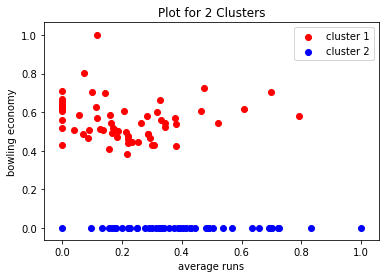

In [23]:
#Plotting the scatter plot for the two clusters.
color=['red','blue']
labels=['cluster 1','cluster 2']
for k in range(K):
    plt.scatter(Output2[k+1][:,0],Output2[k+1][:,1],c=color[k],label=labels[k])
plt.xlabel('average runs')
plt.ylabel('bowling economy')
plt.legend()
plt.title('Plot for 2 Clusters')
plt.show()

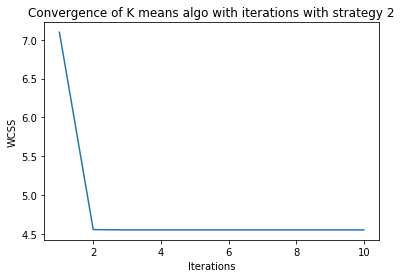

In [24]:
plt.plot(range(1, n_iter+1), WCSS_k)
plt.title('Convergence of K means algo with iterations with strategy 2')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

###  On seeing the above graph, we can conclude that it took 2 iterations for the K means algorithm to converge to local optimum when centroids initialized using strategy 2.

In [65]:
Iter_k_2 = 2

### So, the strategy 2 which is using k means++ to initialize centroid is better strategy as it took lesser iterations to converge.

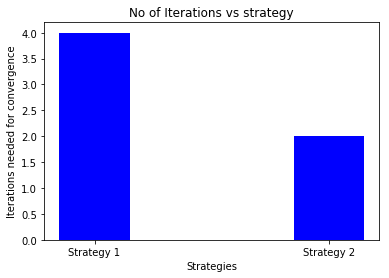

In [32]:
Iteration = [Iter_m_2,Iter_k_2]
Strategy = ['Strategy 1','Strategy 2']
plt.bar(Strategy,Iteration,label ='Linear SVM', width=.3,color='b',align = 'center')
plt.xlabel('Strategies')
plt.ylabel('Iterations needed for convergence')
plt.title('No of Iterations vs strategy')
plt.show()

# Ans 1(b)

### Trying the strategies with K =3,4,5 & 6.

In [26]:
#Strategy 1 for 3 clusters
K = 3
Centroids_mean=np.array([]).reshape(n,0)
CI=np.array([])
m = D.shape[0]
#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.
for i in range(K):
    rand=rd.randint(0,m-1)
    CI = np.mean(D,axis=0) + D[rand]
    Centroids_mean=np.c_[Centroids_mean, CI]
print('Initialized Centroids from strategy 1', Centroids_mean.transpose())


Initialized Centroids from strategy 1 [[0.29487131 0.7442313 ]
 [0.45641688 0.89695858]
 [0.51576014 0.31211009]]


In [27]:
Cent_1_f , Output3M, WCSS_mean_3 = kmeans_algo(D,n,n_iter,Centroids_mean, K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_mean_3)

Within cluster sum of squared distances of data points converging with iterations as:  [11.93995162  3.7860124   3.54102078  3.54102078  3.54102078  3.54102078
  3.54102078  3.54102078  3.54102078  3.54102078]


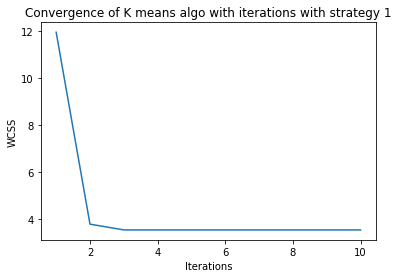

In [28]:
plt.plot(range(1, n_iter+1), WCSS_mean_3)
plt.title('Convergence of K means algo with iterations with strategy 1')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

### Looking at graph above, we conclude that strategy 1 took nearly 3 iterations to converge

In [66]:
Iter_m_3 = 3

In [33]:
#Strategy 2 for 3 clusters
K = 3
km = KMeans(n_clusters=K, init='k-means++', max_iter=1, n_init=1)
km.fit(D)
Centroids_k = km.cluster_centers_
print('Initialized Centroids from strategy 2', Centroids_k)

Initialized Centroids from strategy 2 [[4.02666051e-01 3.33066907e-16]
 [4.93208493e-02 6.13807642e-01]
 [3.07332190e-01 5.23748006e-01]]


In [34]:
Cent_3_f , Output3K, WCSS_k_3 = kmeans_algo(D,n,n_iter,Centroids_k.transpose(), K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_k_3)

Within cluster sum of squared distances of data points converging with iterations as:  [3.45854745 3.44471279 3.43843539 3.41939143 3.40446787 3.40268473
 3.40268473 3.40268473 3.40268473 3.40268473]


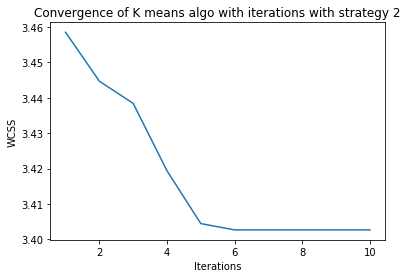

In [35]:
plt.plot(range(1, n_iter+1), WCSS_k_3)
plt.title('Convergence of K means algo with iterations with strategy 2')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

### Looking at graph above, we conclude that strategy 2 took nearly 5 iterations to converge

In [67]:
Iter_k_3 = 5

In [37]:
#Strategy 1 for 4 clusters
K = 4
Centroids_mean=np.array([]).reshape(n,0)
CI=np.array([])
m = D.shape[0]
#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.
for i in range(K):
    rand=rd.randint(0,m-1)
    CI = np.mean(D,axis=0) + D[rand]
    Centroids_mean=np.c_[Centroids_mean, CI]
print('Initialized Centroids from strategy 1', Centroids_mean.transpose())

Initialized Centroids from strategy 1 [[0.68231692 0.31211009]
 [0.38058937 0.77635252]
 [0.78755231 0.31211009]
 [0.99815497 0.31211009]]


In [38]:
Cent_1_f , Output4M, WCSS_mean_4 = kmeans_algo(D,n,n_iter,Centroids_mean, K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_mean_4)

Within cluster sum of squared distances of data points converging with iterations as:  [17.39294703  3.547211    2.36887295  2.23294817  2.22857089  2.22857089
  2.22857089  2.22857089  2.22857089  2.22857089]


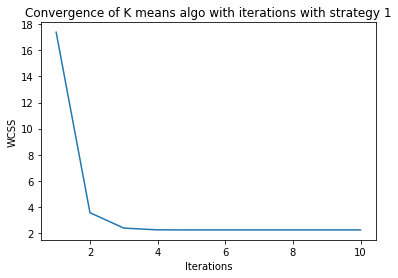

In [39]:
plt.plot(range(1, n_iter+1), WCSS_mean_4)
plt.title('Convergence of K means algo with iterations with strategy 1')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

### Looking at graph above, we conclude that strategy 1 took nearly 3 iterations to converge

In [68]:
Iter_m_4 = 3

In [40]:
#Strategy 2 for 4 clusters
K = 4
km = KMeans(n_clusters=K, init='k-means++', max_iter=1, n_init=1)
km.fit(D)
Centroids_k = km.cluster_centers_
print('Initialized Centroids from strategy 2', Centroids_k)

Initialized Centroids from strategy 2 [[ 1.18476165e-01  5.60303030e-01]
 [ 3.07182001e-01  1.66533454e-16]
 [ 4.12473885e-01  5.51961722e-01]
 [ 6.89118203e-01 -5.55111512e-17]]


In [41]:
Cent_3_f , Output4K, WCSS_k_4 = kmeans_algo(D,n,n_iter,Centroids_k.transpose(), K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_k_4)

Within cluster sum of squared distances of data points converging with iterations as:  [2.09575641 2.09204169 2.08961372 2.08727156 2.08727156 2.08727156
 2.08727156 2.08727156 2.08727156 2.08727156]


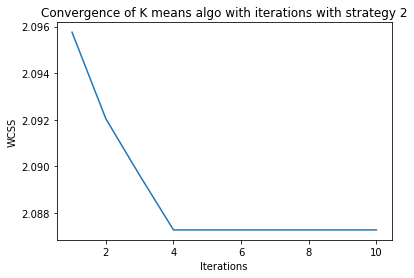

In [42]:
plt.plot(range(1, n_iter+1), WCSS_k_4)
plt.title('Convergence of K means algo with iterations with strategy 2')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

### Looking at graph above, we conclude that strategy 2 took nearly 4 iterations to converge

In [69]:
Iter_k_4 = 4

In [44]:
#Strategy 1 for 5 clusters
K = 5
Centroids_mean=np.array([]).reshape(n,0)
CI=np.array([])
m = D.shape[0]
#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.
for i in range(K):
    rand=rd.randint(0,m-1)
    CI = np.mean(D,axis=0) + D[rand]
    Centroids_mean=np.c_[Centroids_mean, CI]
print('Initialized Centroids from strategy 1', Centroids_mean)

Initialized Centroids from strategy 1 [[0.98866005 0.43333894 0.29487131 0.49597906 0.83397193]
 [0.31211009 0.81877676 0.93029191 0.31211009 0.31211009]]


In [45]:
Cent_1_f , Output4M, WCSS_mean_5 = kmeans_algo(D,n,n_iter,Centroids_mean, K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_mean_5)

Within cluster sum of squared distances of data points converging with iterations as:  [13.77552219  3.84927752  1.95795606  1.89071988  1.88424395  1.88424395
  1.88424395  1.88424395  1.88424395  1.88424395]


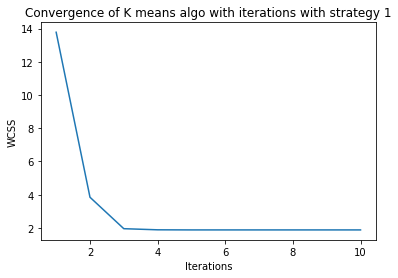

In [46]:
plt.plot(range(1, n_iter+1), WCSS_mean_5)
plt.title('Convergence of K means algo with iterations with strategy 1')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

### Looking at graph above, we conclude that strategy 1 took nearly 3 iterations to converge

In [70]:
Iter_m_5 = 3

In [48]:
#Strategy 2 for 5 clusters
K = 5
km = KMeans(n_clusters=K, init='k-means++', max_iter=1, n_init=1)
km.fit(D)
Centroids_k = km.cluster_centers_
print('Initialized Centroids from strategy 2', Centroids_k)

Initialized Centroids from strategy 2 [[ 7.05933128e-01 -5.55111512e-17]
 [ 2.71317421e-01  5.19622896e-01]
 [ 1.30555189e-01 -5.55111512e-17]
 [ 3.54960658e-01  5.55111512e-17]
 [ 3.77324278e-02  6.64810606e-01]]


In [49]:
Cent_3_f , Output5K, WCSS_k_5 = kmeans_algo(D,n,n_iter,Centroids_k.transpose(), K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_k_5)

Within cluster sum of squared distances of data points converging with iterations as:  [1.9379874  1.79897558 1.75254604 1.74725333 1.73972365 1.72067969
 1.70575614 1.70397299 1.70397299 1.70397299]


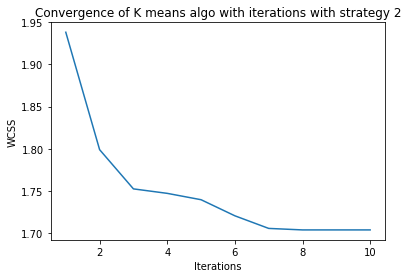

In [50]:
plt.plot(range(1, n_iter+1), WCSS_k_5)
plt.title('Convergence of K means algo with iterations with strategy 2')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

### Looking at graph above, we conclude that strategy 2 took nearly 7 iterations to converge

In [71]:
Iter_k_5 = 7

In [56]:
#Strategy 1 for 6 clusters
K = 6
Centroids_mean=np.array([]).reshape(n,0)
CI=np.array([])
m = D.shape[0]
#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.
for i in range(K):
    rand=rd.randint(0,m-1)
    CI = np.mean(D,axis=0) + D[rand]
    Centroids_mean=np.c_[Centroids_mean, CI]
print('Initialized Centroids from strategy 1', Centroids_mean)

Initialized Centroids from strategy 1 [[0.79902534 0.54543178 0.29487131 0.60912689 0.57391655 0.46630742]
 [0.31211009 0.31211009 0.7442313  0.31211009 0.31211009 0.82907979]]


In [57]:
Cent_1_f , Output6M, WCSS_mean_6 = kmeans_algo(D,n,n_iter,Centroids_mean, K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_mean_6)

Within cluster sum of squared distances of data points converging with iterations as:  [11.85088576  2.13618503  1.83534325  1.78556189  1.77679127  1.7756112
  1.7756112   1.7756112   1.7756112   1.7756112 ]


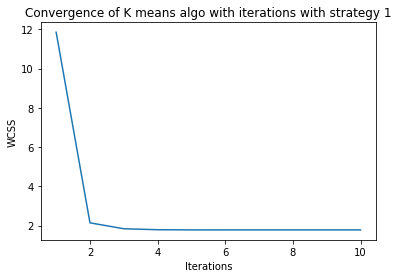

In [58]:
plt.plot(range(1, n_iter+1), WCSS_mean_6)
plt.title('Convergence of K means algo with iterations with strategy 1')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

### Looking at graph above, we conclude that strategy 1 took nearly 3 iterations to converge

In [72]:
Iter_m_6 = 3

In [61]:
#Strategy 2 for 6 clusters
K = 6
km = KMeans(n_clusters=K, init='k-means++', max_iter=1, n_init=1)
km.fit(D)
Centroids_k = km.cluster_centers_
print('Initialized Centroids from strategy 2', Centroids_k)

Initialized Centroids from strategy 2 [[ 2.32718278e-01  5.04602785e-01]
 [ 4.06441442e-01 -5.55111512e-17]
 [ 3.57378346e-02  6.43097643e-01]
 [ 5.93190909e-01  6.28989899e-01]
 [ 7.22616379e-01 -5.55111512e-17]
 [ 1.97505934e-01 -5.55111512e-17]]


In [62]:
Cent_3_f , Output6K, WCSS_k_6 = kmeans_algo(D,n,n_iter,Centroids_k.transpose(), K)
print('Within cluster sum of squared distances of data points converging with iterations as: ',WCSS_k_6)

Within cluster sum of squared distances of data points converging with iterations as:  [1.13589172 1.12329102 1.12179336 1.12179336 1.12179336 1.12179336
 1.12179336 1.12179336 1.12179336 1.12179336]


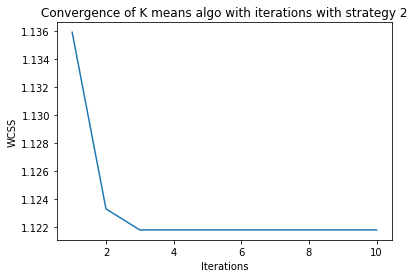

In [63]:
plt.plot(range(1, n_iter+1), WCSS_k_6)
plt.title('Convergence of K means algo with iterations with strategy 2')
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

### Looking at graph above, we conclude that strategy 2 took nearly 3 iterations to converge

In [73]:
Iter_k_6 = 3

In [74]:
Strategy1 = [Iter_m_2,Iter_m_3,Iter_m_4,Iter_m_5,Iter_m_6]
Strategy2 = [Iter_k_2,Iter_k_3,Iter_k_4,Iter_k_5,Iter_k_6]
Clusters = ['K=2','K=3', 'K=4', 'K=5', 'K=6']

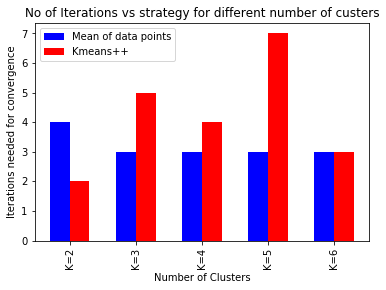

In [81]:
x = np.arange(5)
w=0.3
plt.xticks(x + w /2, Clusters, rotation='vertical')
plt.bar(x,Strategy1,label ='Mean of data points',width=w, color='b', align = 'center')
plt.bar(x+w,Strategy2,label ='Kmeans++', width=w, color='r', align = 'center')
plt.xlabel('Number of Clusters')
plt.ylabel('Iterations needed for convergence')
plt.title('No of Iterations vs strategy for different number of custers')
plt.legend()
plt.show()

### As we can see, the best strategy differs with the number of clusters.

# Ans 2.

In [101]:
# Taking the  runs_scored, average_runs, wickets_obtained, bowling_economy columns in a array D. These are the selected features for clustering the data points.
D = NData[:,[2,5,10,12]]

In [105]:
# Maximum number of iteration for the convergence
n_iter=100

In [115]:
#Using the Kmeans algorithm from sklearn and centroid initialization as k-means++.
WCSS=[]
for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=n_iter, n_init=1)
    km.fit(D)
    WCSS.append(km.inertia_)

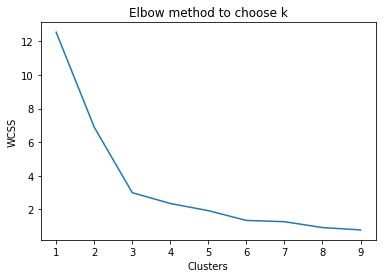

In [217]:
plt.plot(range(1, 10), WCSS)
plt.title('Elbow method to choose k')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

### From the elbow curve, we can conclude that 3 clusters are most appropriate. After 3, the curve is not bending much.

# Ans 3(a)

In [459]:
# Taking the  runs_scored annd wickets_obtained columns in a array D. These are the selected features for clustering the data points.
D = NData[:,[2,10]]

In [460]:
#Appending the player names column to the ND array from new Data. The column of player names was dropped to 
#normalize the data using min max scalar. As we need the player names as well to build team, appending it to ND along woth
#the selected features.
ND = []
ND = new.iloc[:,0].to_numpy().reshape(-1,1)
ND = np.append(ND,D, axis =1)

In [461]:
# Maximum number of iteration for the convergence
n_iter=100
#Using the Kmeans algorithm from sklearn and centroid initialization as k-means++.
WCSS=[]
for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=n_iter, n_init=1)
    km.fit(D)
    WCSS.append(km.inertia_)

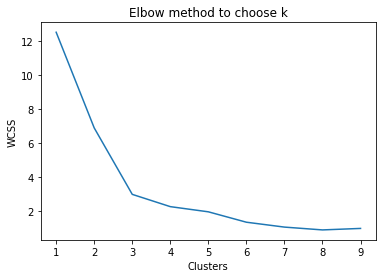

In [462]:
plt.plot(range(1, 10), WCSS)
plt.title('Elbow method to choose k')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

### From the elbow curve, we can conclude that 3 clusters are most appropriate. 

In [463]:
#CLustering the data points using K =3
km = KMeans(n_clusters=3, init='k-means++', max_iter=n_iter, n_init=10)
km.fit(D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

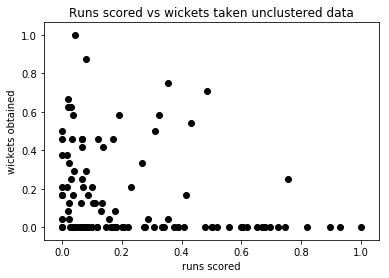

In [464]:
#Plotting the data
plt.scatter(D[:,0],D[:,1],c='black',label='unclustered data')
plt.xlabel('runs scored')
plt.ylabel('wickets obtained')
plt.title('Runs scored vs wickets taken unclustered data')
plt.show()

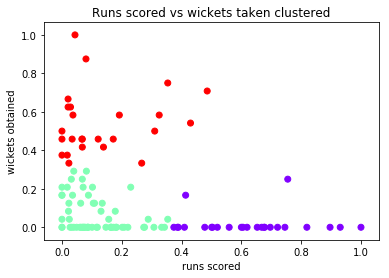

In [465]:
#Plotting the clusterson on scatter plot
plt.scatter(D[:,0],D[:,1], c=km.labels_, cmap='rainbow')
plt.xlabel('runs scored')
plt.ylabel('wickets obtained')
plt.title('Runs scored vs wickets taken clustered')
plt.show()

In [466]:
labels = km.labels_.reshape(-1,1)

In [467]:
#Concatinating the labels, players name and data points in a single array ND.
ND = np.append(ND,labels, axis =1)

In [468]:
#Calculating the maximum of two columns to search for bowlers and batsmen
C = np.argmax(D,axis =0)

In [469]:
#Cluster of batsman is the cluster with maximum runs scored
CBat = ND[C[0],3]
Bat_cluster = ND[ND[:,3]==CBat]
#Getting the indices of top 4 batsmen from batsmen cluster
ind_bat = np.argpartition(Bat_cluster[:,1], -4)[-4:]
Batsmen= []
#Getting the top 4 batsmen from batsmen cluster based on the indices obtained
for i in ind_bat:
    Batsmen = np.append(Batsmen,Bat_cluster[i])
Batsmen = Batsmen.reshape(4,-1)
print('Batsmen selected for team are:', Batsmen[:,0])

Batsmen selected for team are: ['Ambati Rayudu' 'Lokesh Rahul' 'Rishabh Pant' 'Kane Williamson ']


In [470]:
#Cluster of bowlers is the cluster with maximum wicets obtained
CBowl = ND[C[1],3]
Bowl_cluster = ND[ND[:,3]==CBowl]
#Getting the indices of top 4 bowlers from bowlers cluster
ind_bowl = np.argpartition(Bowl_cluster[:,2], -4)[-4:]
Bowlers= []
#Getting the top 4 bowlers from bowlers cluster based on the indices obtained
for i in ind_bowl:
    Bowlers = np.append(Bowlers,Bowl_cluster[i])
Bowlers = Bowlers.reshape(4,-1)
print('Bowlers selected for team are:', Bowlers[:,0])

Bowlers selected for team are: ['Sunil 0rine' 'Hardik Pandya' 'Rashid Khan' 'Andrew Tye']


In [471]:
#Cluster of all rounders is the remaining cluster
Allround_cluster = ND[np.where((ND[:,3] != CBat) & (ND[:,3] != CBowl))]
#Getting the indices of the top 3 players with maximum average of runs scored and wickets taken
ind_all = np.argpartition((Allround_cluster[:,1]+ Allround_cluster[:,2])/2, -3)[-3:]
Allrounders= []
#Getting the top 3 allrounders from allrounders cluster based on the indices obtained
for i in ind_all:
    Allrounders = np.append(Allrounders,Allround_cluster[i])
Allrounders = Allrounders.reshape(3,-1)
print('Allrounders selected for team are:', Allrounders[:,0])

Allrounders selected for team are: ['Harshal Patel' 'Yusuf Pathan' 'Glenn Maxwell']


In [472]:
#Appending all the three player categories arrays for gettig Team
Team = []
Team = np.append(Team, Batsmen)
Team = np.append(Team, Allrounders)
Team = np.append(Team, Bowlers)
Team = Team.reshape(-1,4)
print('Cricketers selected for the team are:', Team[:,0])


Cricketers selected for the team are: ['Ambati Rayudu' 'Lokesh Rahul' 'Rishabh Pant' 'Kane Williamson '
 'Harshal Patel' 'Yusuf Pathan' 'Glenn Maxwell' 'Sunil 0rine'
 'Hardik Pandya' 'Rashid Khan' 'Andrew Tye']


# Ans 3(b)

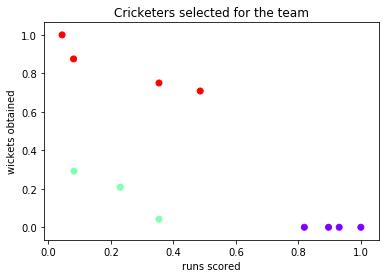

In [485]:
#Plotting the selected cricketers for team on a scatter plot with batsmen, bowlers and allroundrs having different colors
plt.scatter(Team[:,1],Team[:,2], c=Team[:,3], cmap='rainbow')
plt.xlabel('runs scored')
plt.ylabel('wickets obtained')
plt.title('Cricketers selected for the team')
plt.show()